In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lisalyu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/lisalyu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### No Null values

In [7]:
df.isnull().sum().sum()

0

### Duplicates

In [8]:
df.duplicated().sum()

125

In [9]:
df.drop_duplicates(inplace=True, keep = 'first')

In [10]:
df.duplicated().sum()

0

### Imbalance data

In [11]:
df['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

### Some distribution of the data feature

/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/lw/pzqfv0_d4vg4hbggnlj8r2dr0000gn/T/ipykernel_2022/2841587356.p

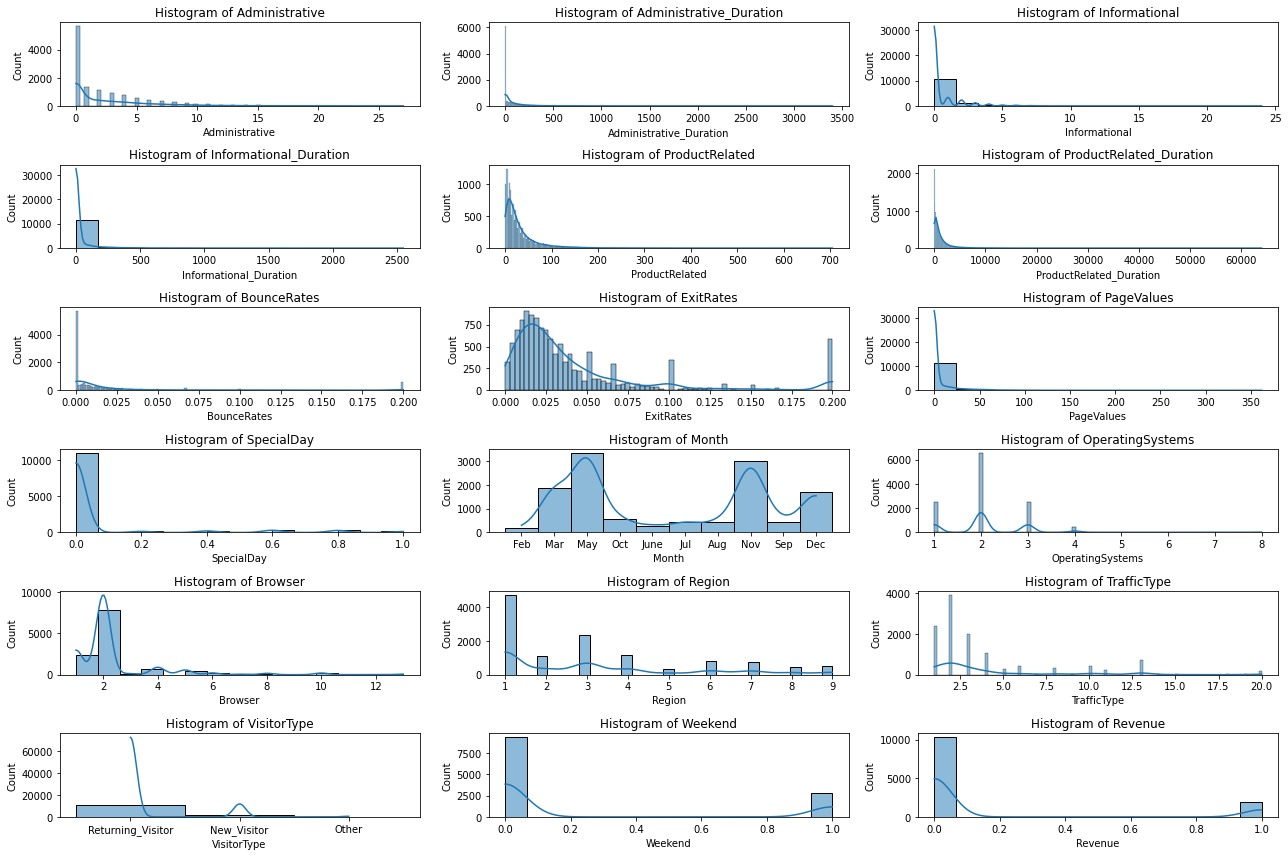

In [12]:
columns = np.array(df.columns)
plt.figure(figsize=(18, 12))

for i, column in enumerate(columns):
    plt.subplot(6, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

plt.show()

## Categorical

/Users/lisalyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


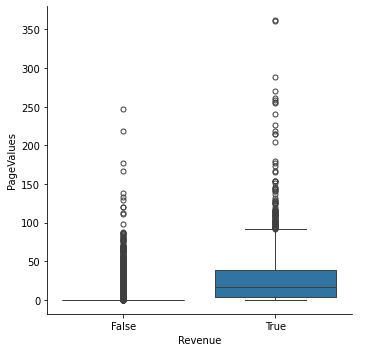

In [13]:
fg = sns.catplot(x="Revenue", y="PageValues", data=df, kind="box", dodge=True)

/Users/lisalyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


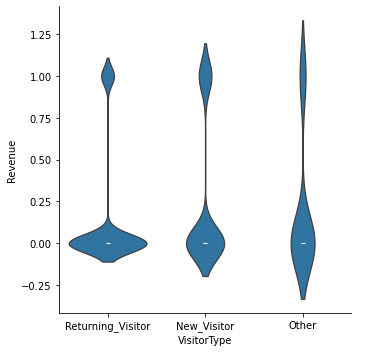

In [14]:
sns.catplot(x="VisitorType", y="Revenue", data=df, kind="violin", dodge=True)

/Users/lisalyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


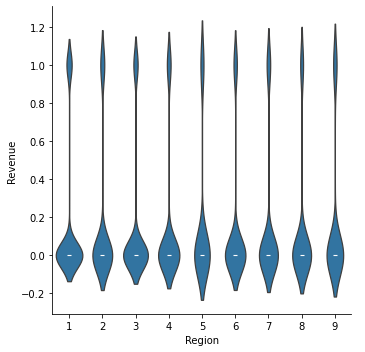

In [15]:
sns.catplot(x="Region", y="Revenue", data=df, kind="violin", dodge=True)

## Correlation

In [16]:
df['Month'].value_counts()

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

### Turn string type to int/float

In [17]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)

### Encoding the visitor_type

In [18]:
df_encoded = pd.get_dummies(df, columns=['VisitorType', 'Browser', 'Region', 'OperatingSystems','TrafficType'])
df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,False,False,False,False,False,False,False,False,False,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,False,False,True,False,False,False,False,False,False,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,False


In [19]:
df_encoded.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,7.667431
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,3.386705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,5.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,8.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,11.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000


In [20]:
corr = df_encoded.corr()
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,...,-0.024933,-0.006357,-0.040067,0.010254,-0.015456,0.003113,-0.006357,-0.002054,-0.010397,-0.009940
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,...,-0.015493,-0.004164,-0.018263,0.035969,-0.002980,0.018930,-0.004164,-0.001534,-0.008727,0.000212
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,...,-0.015352,-0.003610,-0.026132,0.042114,-0.003298,-0.006254,-0.003610,-0.004686,-0.006284,-0.019146
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,...,-0.014945,-0.002229,-0.020463,0.033271,-0.011359,-0.003861,-0.002229,-0.001666,0.023938,-0.010710
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,...,-0.022030,-0.005896,0.007570,0.034778,-0.019174,-0.005877,-0.005693,-0.011653,0.006366,-0.032415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TrafficType_16,0.003113,0.018930,-0.006254,-0.003861,-0.005877,-0.004932,-0.007058,-0.007972,-0.005001,-0.004865,...,-0.002254,-0.000142,-0.003949,-0.000512,-0.000865,1.000000,-0.000142,-0.000449,-0.000586,-0.001988
TrafficType_17,-0.006357,-0.004164,-0.003610,-0.002229,-0.005693,-0.005409,0.005927,0.006576,-0.002887,0.042530,...,-0.001301,-0.000082,-0.002280,-0.000296,-0.000499,-0.000142,1.000000,-0.000259,-0.000338,-0.001147
TrafficType_18,-0.002054,-0.001534,-0.004686,-0.001666,-0.011653,-0.010499,0.008073,0.007190,-0.009134,0.002590,...,-0.004116,-0.000259,-0.007212,-0.000935,-0.001579,-0.000449,-0.000259,1.000000,-0.001069,-0.003630
TrafficType_19,-0.010397,-0.008727,-0.006284,0.023938,0.006366,0.005922,0.004440,0.006712,-0.004910,0.028025,...,-0.005368,-0.000338,-0.009406,-0.001220,-0.002059,-0.000586,-0.000338,-0.001069,1.000000,-0.004734


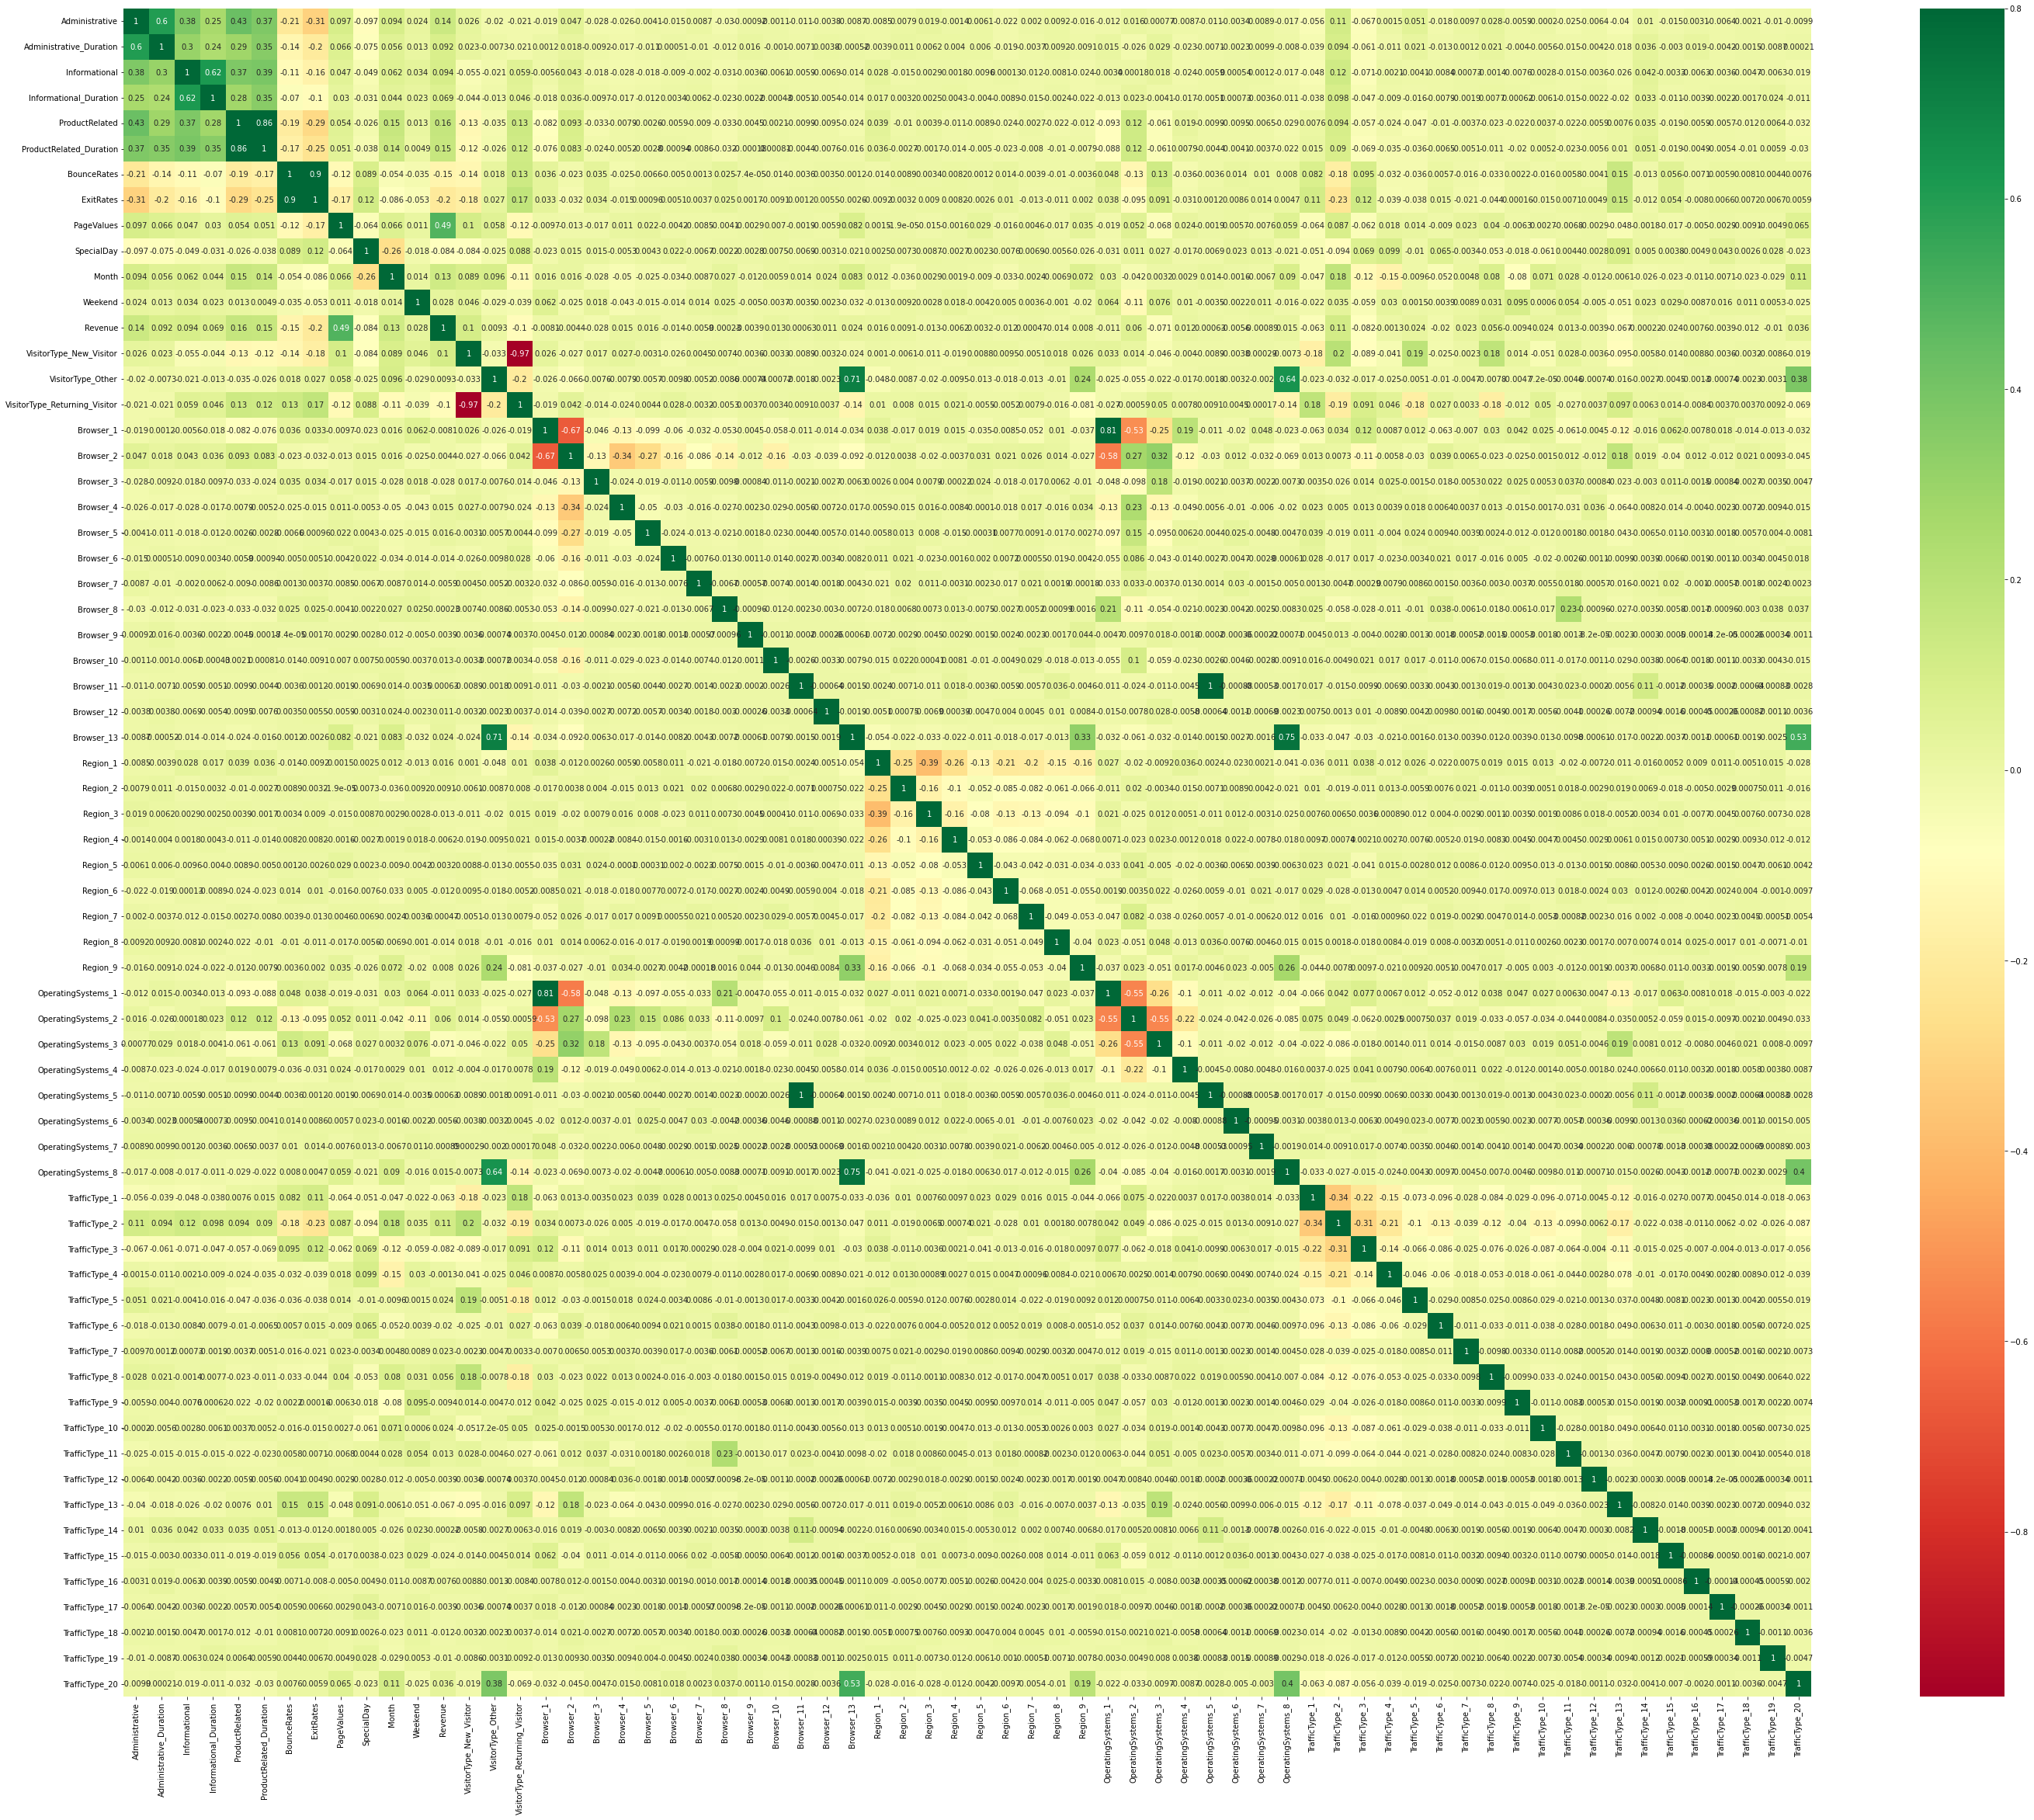

In [21]:
from scipy import stats
ax = plt.subplots(figsize=(50, 40))
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True,cmap="RdYlGn")